In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K

In [39]:
data = pd.read_csv('DATA/house_prices.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploracion de los datos

In [40]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [31]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [43]:
data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [44]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Preparacón de los datos de entrada

In [45]:
data = data.sample(frac=1).reset_index(drop=True)

In [46]:
X_dataframe = data[['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'GarageArea']].copy()

In [49]:
Y_dataframe = data[['SalePrice']]

In [56]:
X_dataframe['LotFrontage'] = X_dataframe['LotFrontage'].fillna(0)

In [60]:
print(X_dataframe.isna().sum())

LotFrontage    0
LotArea        0
1stFlrSF       0
2ndFlrSF       0
GarageArea     0
dtype: int64


In [61]:
X_dataframe = (X_dataframe-X_dataframe.mean())/X_dataframe.std()

In [62]:
X_dataframe

,LotFrontage,LotArea,1stFlrSF,2ndFlrSF,GarageArea
0,0.357045,-0.177115,0.766639,-0.794891,0.252660
1,-0.017981,-0.224103,-0.596570,-0.794891,-0.780993
2,0.126260,-0.260471,-0.542249,0.794925,-0.060710
3,0.934007,-0.061799,0.039767,1.569216,-1.253387
4,0.414741,0.014845,0.818374,-0.794891,0.397652
...,...,...,...,...,...
1455,0.068564,-0.512643,-0.231841,-0.794891,-0.687450
1456,-1.662324,-0.260471,-0.128371,-0.794891,0.145085
1457,1.222488,-0.034247,0.678690,-0.794891,0.481841
1458,0.328197,-0.031241,-0.423259,-0.794891,-0.809056


In [63]:
Y_dataframe

,SalePrice
0,192000
1,124000
2,175000
3,117500
4,226000
...,...
1455,108480
1456,148000
1457,180500
1458,134500


In [64]:
x_tensor = tf.constant(X_dataframe.values, dtype = tf.float32, shape=[1460,5])
y_tensor = tf.constant(Y_dataframe.values, dtype = tf.float32, shape=[1460,1])

In [65]:
DATASET_SIZE = 1460
train_size = int(0.7 * DATASET_SIZE)
test_size = int(0.3 * DATASET_SIZE)

x_train = x_tensor[:train_size]
x_test = x_tensor[train_size:]

y_train = y_tensor[:train_size]
y_test = y_tensor[train_size:]


## Creación del modelo

In [86]:
inputs = layers.Input(shape=(5,1))
x = layers.Dense(100,activation='relu')(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(100,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(100,activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='linear')(x)
model_1 = keras.Model(inputs=inputs, outputs=output)

In [87]:
model_1.compile(optimizer= "Adam",
             loss="mse",
             metrics=["mse"])

In [88]:
history_1 = model_1.fit(x_train,y_train, 
                    validation_data = (x_test,y_test),
                    verbose=2,
                    epochs=40)

Epoch 1/40
32/32 - 0s - loss: 38722490368.0000 - mse: 38722490368.0000 - val_loss: 39773540352.0000 - val_mse: 39773540352.0000
Epoch 2/40
32/32 - 0s - loss: 38716112896.0000 - mse: 38716112896.0000 - val_loss: 39756906496.0000 - val_mse: 39756906496.0000
Epoch 3/40
32/32 - 0s - loss: 38668443648.0000 - mse: 38668443648.0000 - val_loss: 39660437504.0000 - val_mse: 39660437504.0000
Epoch 4/40
32/32 - 0s - loss: 38466805760.0000 - mse: 38466805760.0000 - val_loss: 39314837504.0000 - val_mse: 39314837504.0000
Epoch 5/40
32/32 - 0s - loss: 37882265600.0000 - mse: 37882265600.0000 - val_loss: 38422556672.0000 - val_mse: 38422556672.0000
Epoch 6/40
32/32 - 0s - loss: 36558938112.0000 - mse: 36558938112.0000 - val_loss: 36575547392.0000 - val_mse: 36575547392.0000
Epoch 7/40
32/32 - 0s - loss: 34074968064.0000 - mse: 34074968064.0000 - val_loss: 33351227392.0000 - val_mse: 33351227392.0000
Epoch 8/40
32/32 - 0s - loss: 30104819712.0000 - mse: 30104819712.0000 - val_loss: 28550400000.0000 - va

In [89]:
hist = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch 

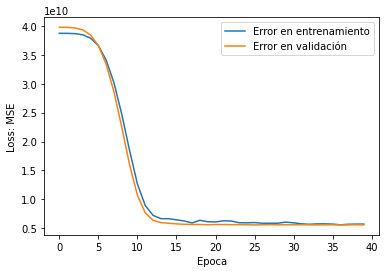

In [90]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: MSE')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.legend()
plt.show()

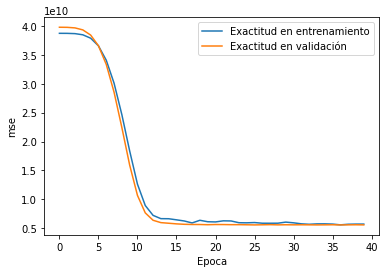

In [92]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('mse')
plt.plot(hist['epoch'], hist['mse'],
           label='Exactitud en entrenamiento')
plt.plot(hist['epoch'], hist['val_mse'],
           label='Exactitud en validación')
plt.legend()
plt.show()